#  Task 3: Cross-Country Comparison

In [2]:
# 📦 Import necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

## Load the Data, Add Country Label and combining.

In [3]:
# Load cleaned data
benin = pd.read_csv("data/benin_clean.csv")
sierra = pd.read_csv("data/sierraleone_clean.csv")
togo = pd.read_csv("data/togo_clean.csv")

# Add country labels
benin['country'] = 'Benin'
sierra['country'] = 'Sierra Leone'
togo['country'] = 'Togo'

# Combine
df = pd.concat([benin, sierra, togo])


## 📊 Boxplots by Country

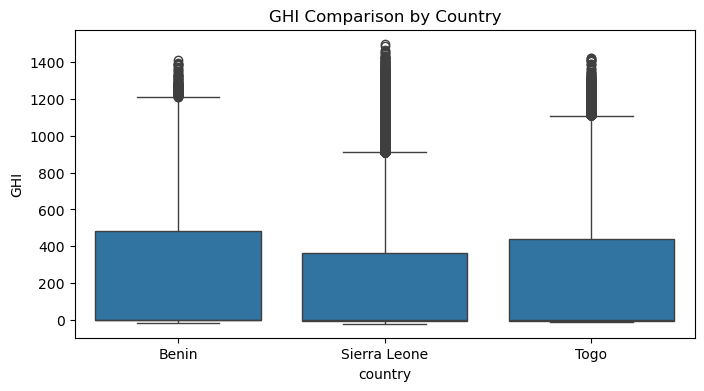

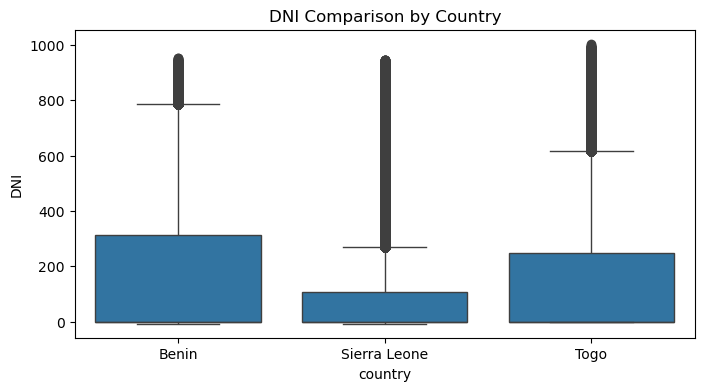

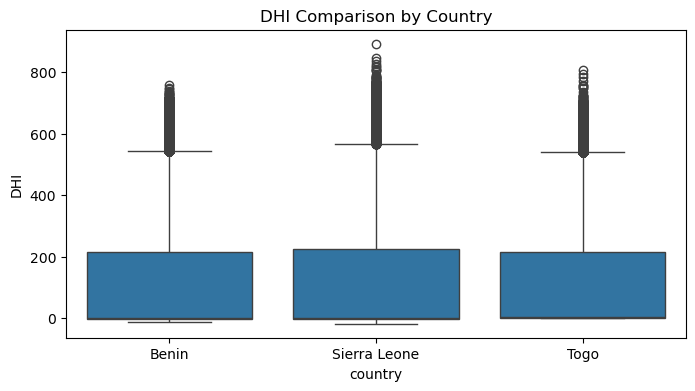

In [4]:
for col in ["GHI", "DNI", "DHI"]:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='country', y=col, data=df)
    plt.title(f"{col} Comparison by Country")
    plt.show()


## 📑 Summary Table

In [5]:
metrics = ['GHI', 'DNI', 'DHI']
summary = df.groupby("country")[metrics].agg(["mean", "median", "std"])
summary


GHI                            DNI                     \
                    mean median         std        mean median         std   
country                                                                      
Benin         240.559452    1.8  331.131327  167.187516   -0.1  261.710501   
Sierra Leone  201.957515    0.3  298.495150  116.376337   -0.1  218.652659   
Togo          230.555040    2.1  322.532347  151.258469    0.0  250.956962   

                     DHI                     
                    mean median         std  
country                                      
Benin         115.358961    1.6  158.691074  
Sierra Leone  113.720571   -0.1  158.946032  
Togo          116.444352    2.5  156.520714

#### - Benin has the highest median GHI but also wider variability.
#### - Sierra Leone shows more stable values with less extreme peaks.
#### - Togo has moderate values across most metrics.


## 🧪 One-way ANOVA

In [6]:
from scipy.stats import f_oneway

f_stat, p_value = f_oneway(
    benin['GHI'].dropna(),
    sierra['GHI'].dropna(),
    togo['GHI'].dropna()
)
print(f"ANOVA F-statistic: {f_stat}, p-value: {p_value}")


ANOVA F-statistic: 2090.092870479632, p-value: 0.0


## 📉 Bonus: Average GHI Bar Chart

<Axes: title={'center': 'Average GHI by Country'}, xlabel='country'>

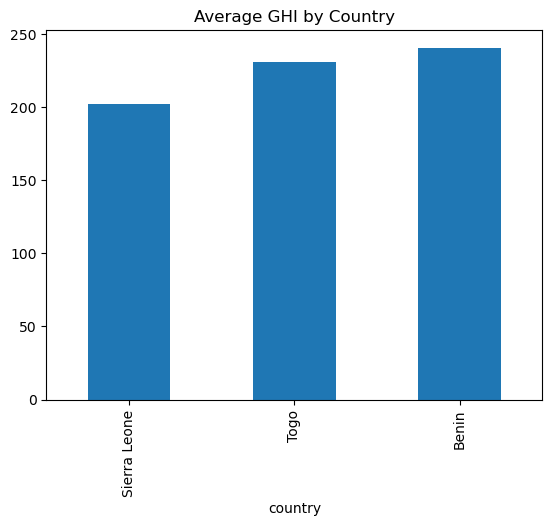

In [7]:
df.groupby("country")["GHI"].mean().sort_values().plot(kind='bar', title="Average GHI by Country")
